# Neural Networks - HW5 

### TEAM 3
- Anjali Sebastian
- Yesha Sharma
- Rupansh Phutela

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot  figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs

import warnings
warnings.filterwarnings("ignore")
##############################################


# Utility functions
### clf is the classifier that is trained somewhere else and is sent to this function. If we train the neural net with cancer data with 30 attributes, it will not work. Because inside of this function the scores will be calculated with two-dimensional data. This function assumes that the data is two-dimensional. We can train the clf by only two features, or we can rewrite this function to calculate the scores on high dimension data, and use only two features to draw the scatter plots. 

In [2]:
# We use the following function to make subplots and compare different neural networks and compare them. 
def plot_class_regions_for_classifier_subplot(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFAAAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EFEE00', '#FC0000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)


def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

# Activation functions
¶

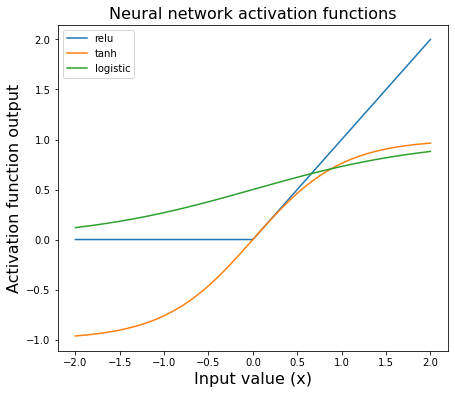

In [3]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

# three commonly used activation functions, relu, tanh, and logistic
import numpy as np
def logistic(x):
    return 1.0/(1 + np.exp(-x))


plt.plot(xrange, np.maximum(xrange,0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label='tanh')
plt.plot(xrange, logistic(xrange), label='logistic')

plt.legend()
plt.title('Neural network activation functions', fontsize='16')
plt.xlabel('Input value (x)', fontsize='16')
plt.ylabel('Activation function output', fontsize='16')

plt.show()

# Synthetic dataset 1: single hidden layer

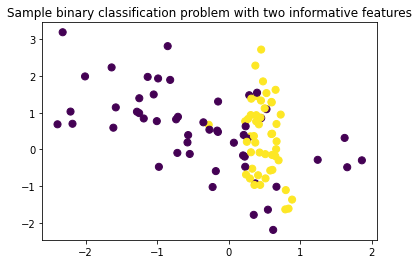

In [4]:
# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o', c=y_C2, s=50)
plt.show()


# MLP classifier

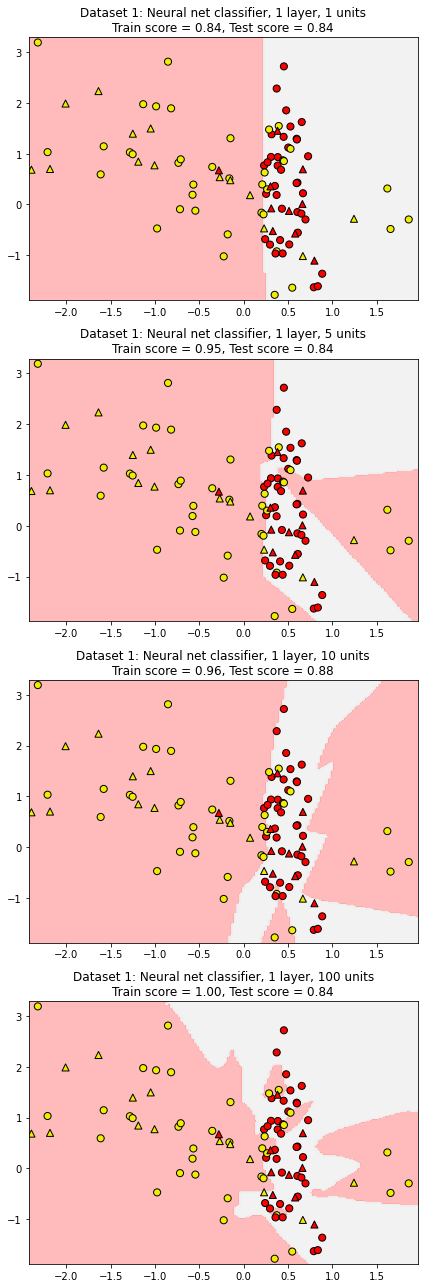

In [5]:
# MLPclassifier
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(4, 1, figsize=(6,18))
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state =0)
for units, axis in zip([1, 5, 10, 100], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [units], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
# split the data
# model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


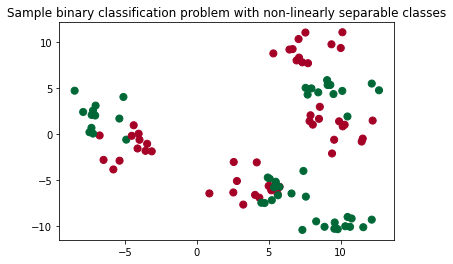

In [6]:
# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=plt.cm.RdYlGn)
plt.show()


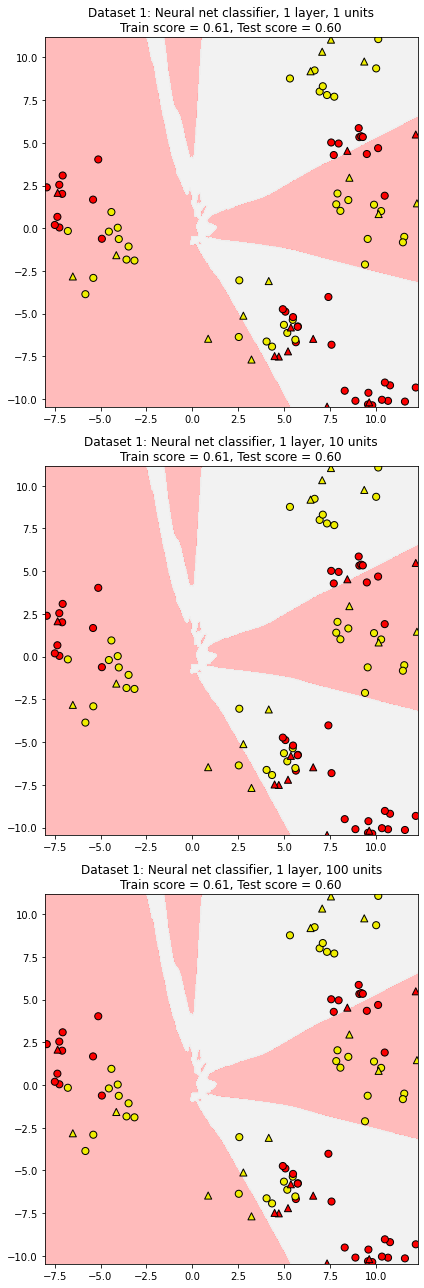

In [7]:
from sklearn.neural_network import MLPClassifier
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
for units, axis in zip([1, 10, 100], subaxes):
    # model training with one hidden layer
    title = 'Dataset 1: Neural net classifier, 1 layer, {} units'.format(units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# Synthetic dataset 2: two hidden layers

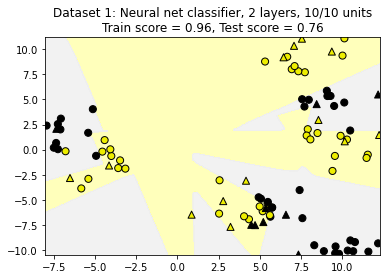

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

# model training with two hidden layers

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], activation = 'tanh',
                          solver='lbfgs', random_state=0).fit(X_train,y_train)


plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test,
                                 'Dataset 1: Neural net classifier, 2 layers, 10/10 units')

# Regularization parameter: alpha

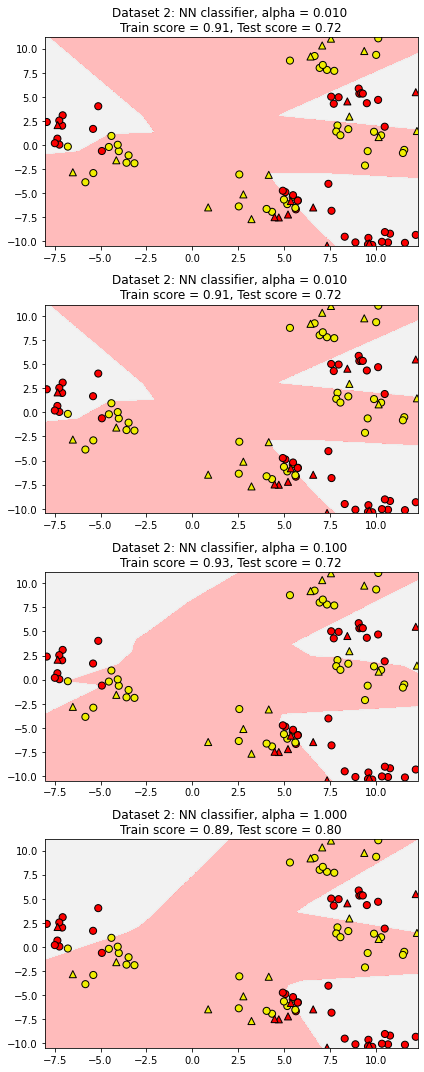

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(4, 1, figsize=(6, 15))
for this_alpha, axis in zip([0.01, 0.01, 0.1, 1, 10], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = this_alpha,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, alpha = {:.3f} '.format(this_alpha)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()

# The effect of different choices of activation function

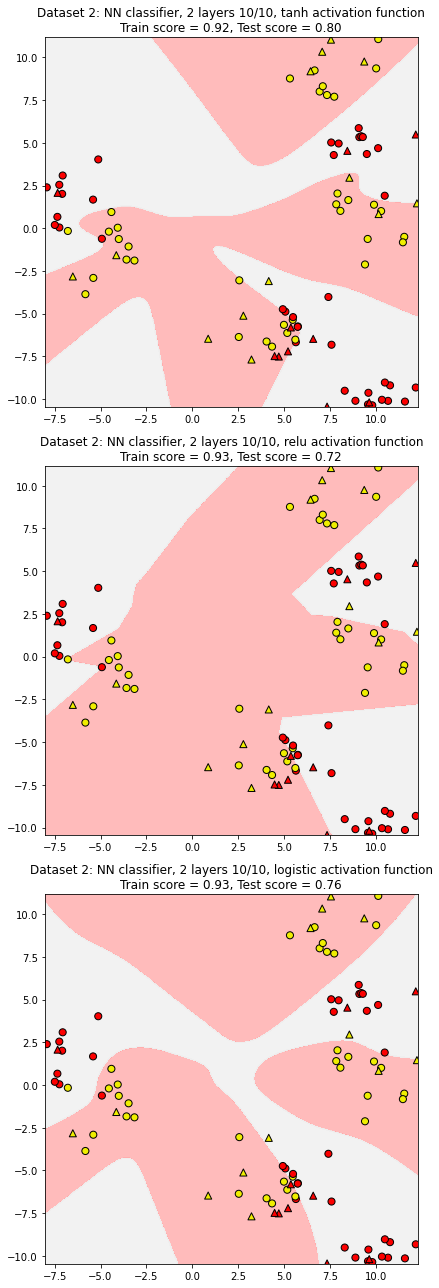

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
fig, subaxes = plt.subplots(3, 1, figsize=(6,18))
for this_activation, axis in zip(['tanh', 'relu', 'logistic'], subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes = [10,10],
                          alpha = 0.1, activation = this_activation,
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Dataset 2: NN classifier, 2 layers 10/10, {} \
activation function'.format(this_activation)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,
                                             X_test, y_test, title, axis)
    plt.tight_layout()


# HW5        
## Part 1
#### In this assignment, you will implement an MLP neural network to classify breast cancer data.

#### We will apply a neural network with 2 hidden layers with a varying number of units (10, 20, 50, 100).  Then we will find out the optimal alpha parameter value for regularization.  We will also apply different activation functions (logistic, tanh, relu) and we will show their effects. We should also compare the results without scaling and with scaling. 
## Part 2
#### Write a short summary of your analysis result of neural networks.     

### Submission: 

#### Only one team member will submit the assignment.  A Jupyter file (ipynb) and a pdf version of the Jupyter file will be submitted.



We will apply a neural network with 2 hidden layers with a varying number of units (10, 20, 50, 100).  Then we will find out the optimal alpha parameter value for regularization.  We will also apply different activation functions (logistic, tanh, relu) and we will show their effects.
We should also compare the results without scaling and with scaling. 

# Solution ==============================

# PART 1

## 1. Download Breast Cancer Dataset

In [11]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [12]:
X_cancer.shape

(569, 30)

In [13]:
y_cancer.shape

(569,)

In [14]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [15]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [16]:
y_cancer[y_cancer==0].shape

(212,)

Note: The value 0 indicated malignant tumor(212 counts) while 1 indicates benign tumor (357 counts).
Data infered from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

## 2. Normalizing Data and Selecting two features 

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalize the data using MinMAxScaler
X_cancer_normalized = scaler.fit_transform(X_cancer)

# normalized data is stored here
X_cancer_normalized

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [18]:
# choosing any two attributes 
attribute1 = 0
attribute2 = 1

# Not normalized data 
X_cancer = X_cancer[:,[attribute1,attribute2]]

# Normalized Data
X_cancer_normalized = X_cancer_normalized[:,[attribute1,attribute2]]

## 3. Simple Visualization 

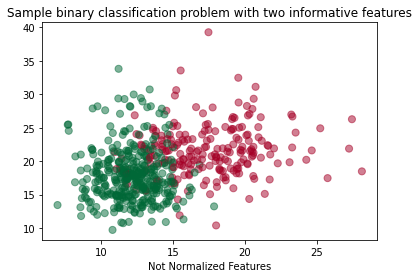

In [19]:
# plotting the 2 of the atrributes of the dataset
plt.figure()
plt.title('Sample binary classification problem with two informative features')
plt.xlabel ("Not Normalized Features")
plt.scatter(X_cancer[:, 0], X_cancer[:, 1], c=y_cancer, marker= 'o', s=50, cmap=plt.cm.RdYlGn, alpha=0.5)
plt.show()

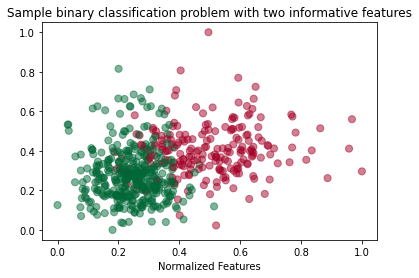

In [20]:
# plotting the 2 of the atrributes of the dataset
plt.figure()
plt.title('Sample binary classification problem with two informative features')
plt.xlabel ("Normalized Features")
plt.scatter(X_cancer_normalized[:, 0], X_cancer_normalized[:, 1], c=y_cancer, marker= 'o', s=50, cmap=plt.cm.RdYlGn, alpha=0.5)
plt.show()

Note: We can see that in the scatter plot there is not much difference in the shape distribution of the dataset between the normalized version and the none normalized version. We will use both data sets to see if there are differences in the neural network performance. 

## 4. MODELS SET 1 : Neural Network with Two Layers, Default Activation Function and No Regularization
- We will create models using both normalized data and not normalized data 
- 4 neural networks with different number of neurons 10/10 , 20/20 , 50/50 , 100/100 

### MODELS WITH NOT NORMALIZED DATA
- default activation function = ReLU
- 2 layers varying units per layer
- no regularization

In [21]:
# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state = 0)

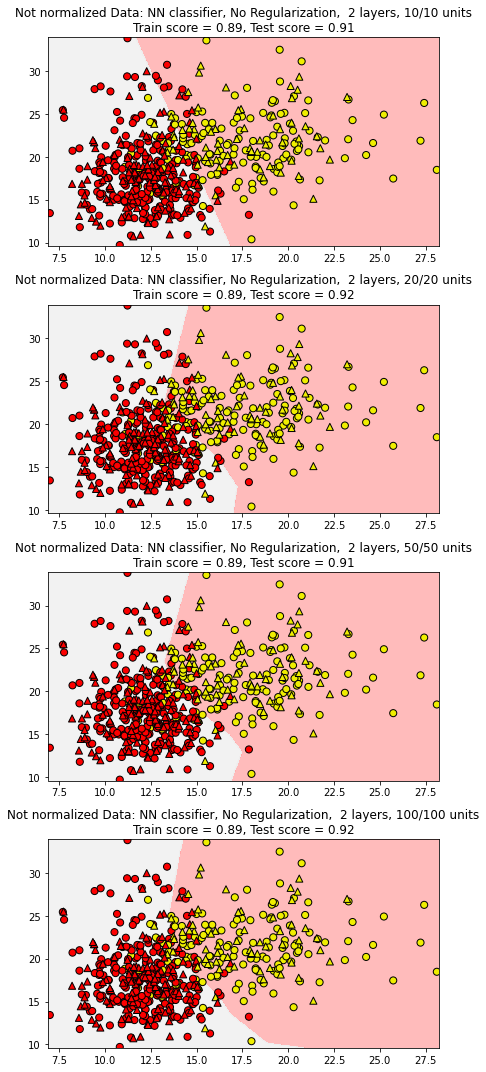

In [22]:
fig, subaxes = plt.subplots(4, 1, figsize=(6, 15))
for units, axis in zip([10, 20,50,100], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [units,units],
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Not normalized Data: NN classifier, No Regularization,  2 layers, {:.0f}/{:.0f} units'.format(units,units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, axis)
    plt.tight_layout()
   

### MODELS WITH NORMALIZED DATA
- default activation function = ReLU
- 2 layers varying units per layer
- no regularization

In [23]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_cancer_normalized, y_cancer, test_size=0.3, random_state = 0)

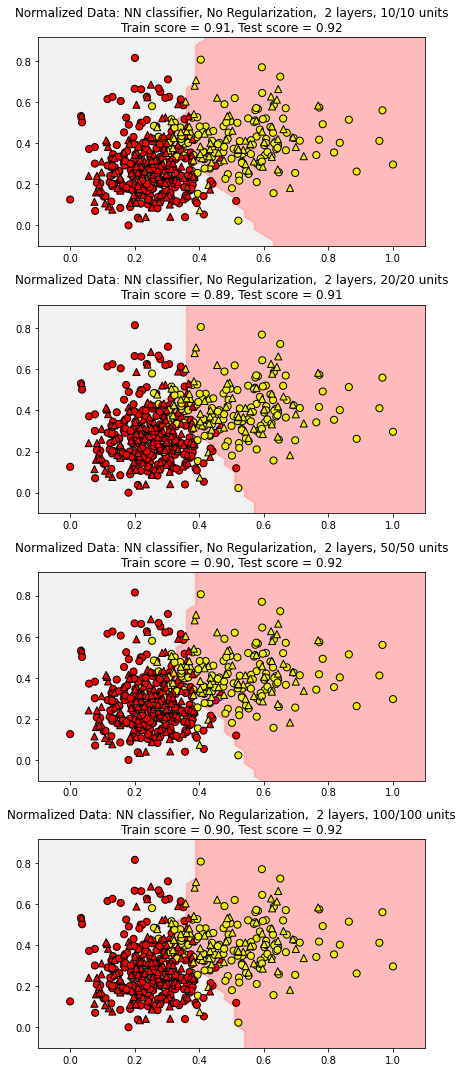

In [24]:
fig, subaxes = plt.subplots(4, 1, figsize=(6, 15))
for units, axis in zip([10,20,50,100], subaxes):
    # training the data
    nnclf = MLPClassifier(hidden_layer_sizes = [units,units],
                          solver='lbfgs', random_state=0).fit(X_train,y_train)
    title = 'Normalized Data: NN classifier, No Regularization,  2 layers, {:.0f}/{:.0f} units'.format(units,units)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, axis)
    plt.tight_layout()
   

**Note** : We see that for larger number of neurons/units per layer the results are not improving drastically. The results between the using normalized data and not normalized data in this case is not significant (within 0.1 percent) however the normalized data is showing better results for both training and testing  0.89 vs 0.9. The 10/10 neuron 2 layer NN is the best as it is giving good results with minimimum complexity. 

## 4. MODELS SET 2 : Finding Alpha - Neural Network with Two Layers and Regularization  Default Activation 
- We will create models using both normalized data and not normalized data 
- 4 neural networks with different number of neurons 10/10 , 20/20, 50/50  , 100/100
- Different values of alpha

### MODELS WITH NOT NORMALIZED DATA
- default activation function = ReLU
- 2 layers varying units per layer
- regularization is varied from alpha = 0.01, 0.1, 1, 10

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state = 0)

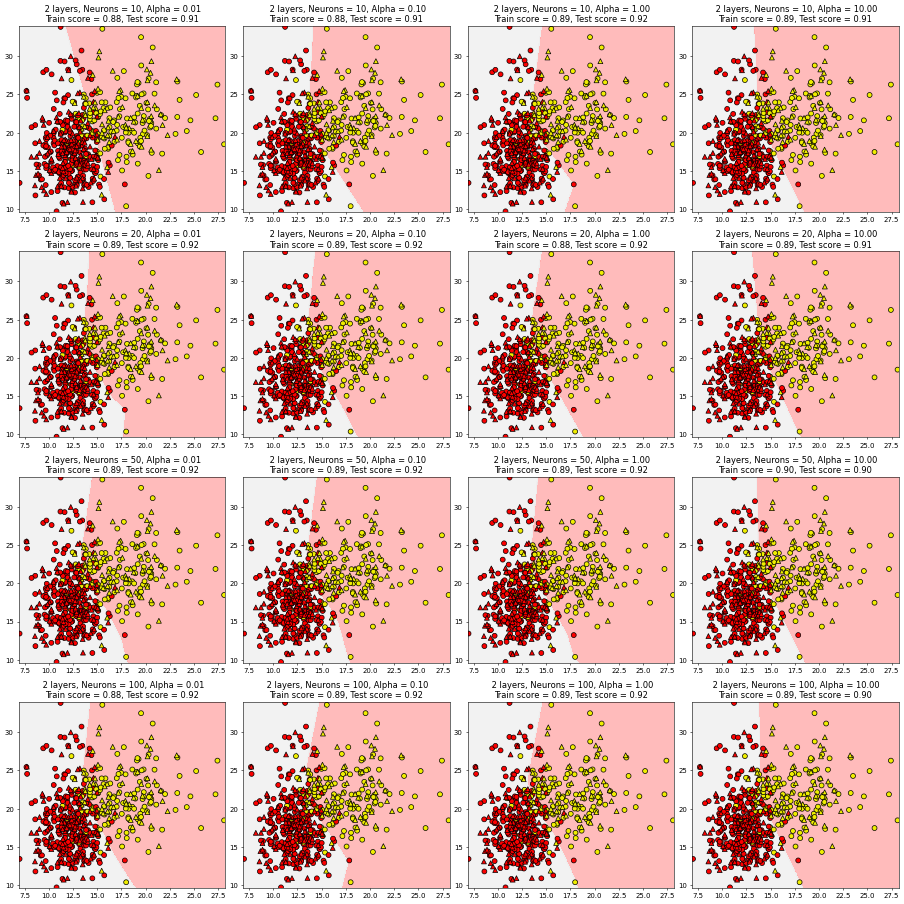

In [26]:
fig, subaxes = plt.subplots(4, 4, figsize=(18, 18), dpi=50)

for this_unit, this_axis in zip([10, 20,50,100], subaxes):  
    for this_alpha, subplot in zip([0.01, 0.1, 1, 10], this_axis):
    
        title = ' 2 layers, Neurons = {:.0f}, Alpha = {:.2f}'.format(this_unit, this_alpha)
        nnclf = MLPClassifier(hidden_layer_sizes = [this_unit,this_unit], alpha = this_alpha, solver='lbfgs', random_state=0).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
    

### MODELS WITH NORMALIZED DATA
- default activation function = ReLU
- 2 layers varying units per layer
- regularization is varied from alpha = 0.01, 0.1, 1, 10

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer_normalized, y_cancer, test_size=0.3, random_state = 0)

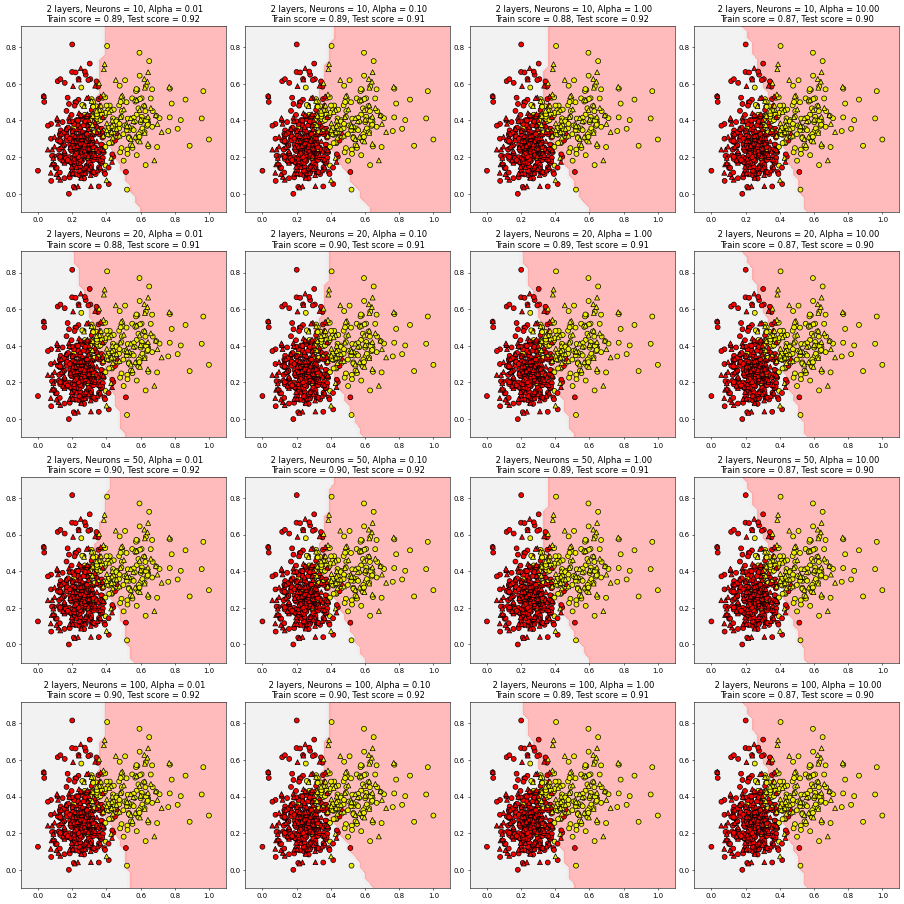

In [28]:
fig, subaxes = plt.subplots(4, 4, figsize=(18, 18), dpi=50)

for this_unit, this_axis in zip([10, 20,50,100], subaxes):  
    for this_alpha, subplot in zip([0.01, 0.1, 1, 10], this_axis):
    
        title = ' 2 layers, Neurons = {:.0f}, Alpha = {:.2f}'.format(this_unit, this_alpha)
        nnclf = MLPClassifier(hidden_layer_sizes = [this_unit,this_unit], alpha = this_alpha, solver='lbfgs', random_state=0).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Notes:  Looking all the different neural nets we see that with more neurons a higher alpha or more regularization yields better results. Since we want a model that has good result with as less complexitiy as possible the neural network with eith (10,10) or (50,50) with alpha value of 0.01 or 0.1 are yielding the best results. Using normalized data is better when the model has more layers. The NN with (20,20) is yielding results not better than (10,10). Also (100,100) NN seems unnecessary since it has similar result to (50,50). Using Normalized data is giving better results across the board.  

## MODELS SET 3: CHANGING ACTIVATION FUNCTIONS - Neural Network with Two Layers and Regularization

- Only normailized data is used as the result is marginally better 
- The best alpha value s of 0.01 and 0.1 will be used
- Units in layers is (10,10) or (20,20) or (50,50) as these were yielding best results above. 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer_normalized, y_cancer, test_size=0.3, random_state = 0)

### NEURAL NETS WITH 2 LAYER 10/10 UNITS
- Try all activation functions = relu,tanh and sigmoid
- Use two suitable alpha = 0.01 and 0.1

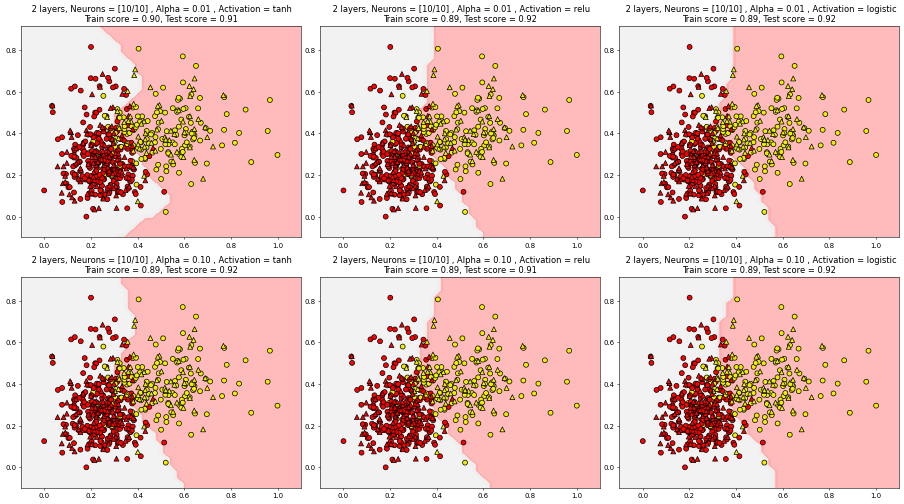

In [30]:
fig, subaxes = plt.subplots(2, 3, figsize=(18, 10), dpi=50)

for this_alpha, this_axis in zip([0.01,0.1], subaxes):  
    for this_activation, subplot in zip(['tanh', 'relu', 'logistic'], this_axis):
    
        title = ' 2 layers, Neurons = [10/10] , Alpha = {:.2f} , Activation = {}'.format(this_alpha,this_activation)
        nnclf = MLPClassifier(hidden_layer_sizes = [10,10], alpha = this_alpha, solver='lbfgs', random_state=0, activation = this_activation).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### NEURAL NETS WITH 2 LAYER 20/20 UNITS
- Try all activation functions = relu, tanh and sigmoid
- Use two suitable alpha = 0.01 and 0.1

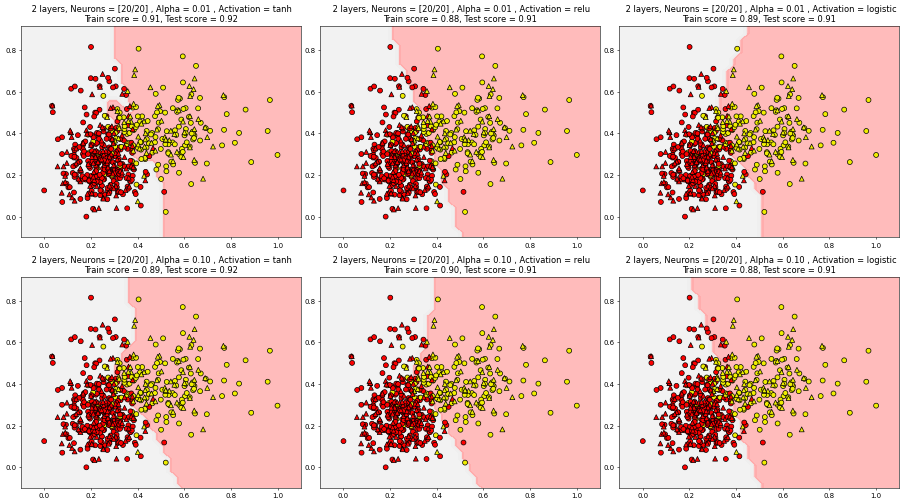

In [31]:
fig, subaxes = plt.subplots(2, 3, figsize=(18, 10), dpi=50)

for this_alpha, this_axis in zip([0.01,0.1], subaxes):  
    for this_activation, subplot in zip(['tanh', 'relu', 'logistic'], this_axis):
    
        title = ' 2 layers, Neurons = [20/20] , Alpha = {:.2f} , Activation = {}'.format(this_alpha,this_activation)
        nnclf = MLPClassifier(hidden_layer_sizes = [20,20], alpha = this_alpha, solver='lbfgs', random_state=0, activation = this_activation).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### NEURAL NETS WITH 2 LAYER 50/50 UNITS
- Try all activation functions = relu, tanh and sigmoid
- Use two suitable alpha = 0.01 and 0.1

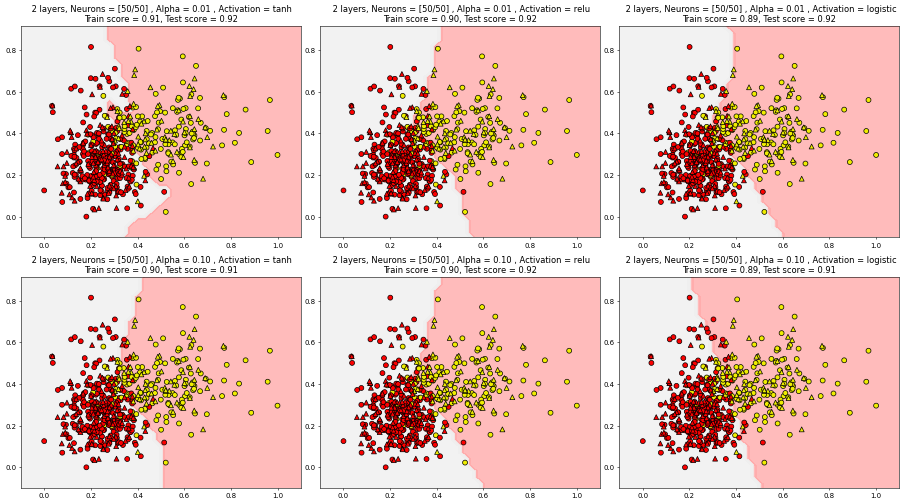

In [32]:
fig, subaxes = plt.subplots(2, 3, figsize=(18, 10), dpi=50)

for this_alpha, this_axis in zip([0.01,0.1], subaxes):  
    for this_activation, subplot in zip(['tanh', 'relu', 'logistic'], this_axis):
    
        title = ' 2 layers, Neurons = [50/50] , Alpha = {:.2f} , Activation = {}'.format(this_alpha,this_activation)
        nnclf = MLPClassifier(hidden_layer_sizes = [50,50], alpha = this_alpha, solver='lbfgs', random_state=0, activation = this_activation).fit(X_train,y_train)
        plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train,X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

Notes: (10/10) , alpha = 0.01 with tanh 
Different boudarys based on each activation function

tanh best performance across all the NN
Normailzation yes. 

# PART 2 : Summary of Analysis

After downloading the breast cancer dataset we visualized the scatter plot for two of the features. The scatter plot does not show any clear linear decision boundary.  We normalized the data and made a scatter plot for the normalized data. The scatter plots between the normalized and not normalized data is very similar in distribution/shape.We therefore used both the  versions in our models to see if there are any differences in the model perfomance.

We first made neural network models with two layers of 10, 20, 50 and 100 neurons per layer using default activation function ReLU. We see that for larger number of neurons/units per layer, the results are not improving drastically. After running the two layer models on non-normalized data we also ran it on normalized data. Here we noted that there was a slight improvement in performance in the normalized data model (within 0.1 percent).

Our previous models did not have any regularization so we tried to find the best regularization hyperparamter (alpha) for the different neural units per layer. We tried the following values of alpha = 0.01 , 0.1 ,1,10. Looking at all the different neural nets we see that with more neurons a higher alpha or more regularization yields better results. Since we want a model that has good results with as less complexity as possible the neural network with either (10,10) or (20/20) or (50,50) with alpha value of 0.01 or 0.1 are yielding the best results. The 100/100 neural network  

Having found good values of alpha = 0.01, 0.1 and neural network 10/10, 20/20 and 50/50 we explored the impact of various activation functions = ReLU, tanh and logistic. Among the three across the board tanh had better performance.
The best model was neural network with 20/20 , alpha = 0.01 because it has accuracy of 0.91 in train and 0.92 in test. The 50/50 had similar performance with more neurons which unneccessarily increases complexity.


# --END--